# 분류분석 / 결정 트리 분석을 이용한 사용자 움직임 분류 프로젝트

## 1) 데이터 수집

#### - https://archive.ics.uci.edu/에 접속하여, ‘human activity recognition’를 검색한다. 
 -‘UCI HAR Dataset’  압축파일을 다운받아서, 압축을 푼다. 

###  "Duplicate names are not allowed" 에러가 발생하지 않도록 pandas 버전을 down grade하여 설치 하기
#### 방법1) Anaconda Prompt를 관리자 권한으로 실행하여, pip install pandas==0.24.2  
##### >> [Anaconda Prompt] 메뉴에서 마우스 오른쪽 버튼을 클릭하고 [자세히]-[관리자 권한으로 실행]한 후에 명령어 입력
#### 방법2) 주피터 노트북을 관리자 권한으로 실행한 후에, !pip install pandas==0.24.2  
##### >> [Jupyter Notebook] 메뉴에서 마우스 오른쪽 버튼을 클릭하고 [자세히]-[관리자 권한으로 실행] 한 후에 명령어 입력

In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

In [2]:
!pip install pandas==0.24.2  

## 2) 데이터 준비 및 탐색

In [3]:
import numpy as np
import pandas as pd

pd.__version__ 

'0.24.2'

- 필요한 모듈을 임포트하고 설치되어 있는 pandas 버전을 확인

In [4]:
feature_name_df = pd.read_csv('./UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt', sep='\s+',  header=None, names=['index', 'feature_name'], engine='python')

In [5]:
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [6]:
feature_name_df.shape

(561, 2)

In [7]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [8]:
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

- 피처 이름이 있는 features.txt 파일을 열어서 내용을 확인 561개 피처가 있는데 feature_name만 추출해서 리스트로 저장

In [9]:
X_train = pd.read_csv('./UCI_HAR_Dataset/UCI_HAR_Dataset/train/X_train.txt', sep='\s+', names=feature_name, engine='python')
X_test = pd.read_csv('./UCI_HAR_Dataset/UCI_HAR_Dataset/test/X_test.txt', sep='\s+', names=feature_name, engine='python')

Y_train = pd.read_csv('./UCI_HAR_Dataset/UCI_HAR_Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'], engine='python')
Y_test = pd.read_csv('./UCI_HAR_Dataset/UCI_HAR_Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'], engine='python')

In [10]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

- train 폴더와 test 폴더에는 훈련용 X/Y 데이터와 테스트용 X/Y 데이터가 txt 파일로 들어 있음 파일을 읽어서 저장하고 크기를 확인하면X_train.shape, Y_train.shape, X_test. shape, Y_test.shape 훈련용 데이터는 7,352개, 테스트용 데이터는 2,947개로 구성된 것을 확인 가능

In [13]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


- 훈련용 X 데이터는 feature_name에서 확인했던 561개 피처로 구성되어 있음

In [14]:
print(Y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


- Y 데이터는 6가지 움직임에 대한 레이블(분류할 class)값으로 되어있으므로, 각 레이블의 데이터 개수value_counts( )를 확인

In [15]:
label_name_df = pd.read_csv('./UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt', sep='\s+',  header=None, names=['index', 'label'], engine='python')

- 레이블 이름이 있는 파일인 activity_labels.txt에서 label_name만 추출해 리스트로 저장

In [16]:
label_name = label_name_df.iloc[:, 1].values.tolist()

label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

- index 제거하고, feature_name만 리스트로 저장

## 3) 모델 구축 : 결정트리모델

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_HAR = DecisionTreeClassifier(random_state=156)

dt_HAR.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

- 사이킷런을 사용하여 결정 트리 분류 분석을 하기 위해 sklearn.tree 패키지에 있는 DecisionTreeClassifier 모듈을 임포트
- 훈련용 데이터와 테스트용 데이터는 이미 준비되어 있으므로 모델 생성 작업을 수행
- 모델 훈련을 수행, 훈련이 끝나고 출력된 결정 트리 모델의 매개변수에서 riterion = 'gini'는 분할 기준으로 지니계수를 사용한다는 의미

In [18]:
Y_predict = dt_HAR.predict(X_test)

- 평가 데이터로 예측을 수행하고 예측값을 Y_predict에 저장

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8548


- 정확도 측정을 위해 accuracy_score 모듈을 임포트
- 테스트용 데이터의 Y_test 값과 결정 트리 모델에서 예측한 Y_predict의 오차를 기반으로 계산한 정확도 점수를 확인

In [20]:
print('결정 트리의 현재 하이퍼 파라미터 : \n', dt_HAR.get_params())

결정 트리의 현재 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


- 결정 트리 모델 학습을 통해 자동 설정되어 있는 하이퍼 매개변수를 확인

## 4) 결과 분석

In [21]:
from sklearn.model_selection import GridSearchCV

- GridSearchCV 모듈을 임포트

### 최적 파라미터 찾기 - 1

In [22]:
params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

- GridSearchCV를 사용하여 결정 트리의 하이퍼 매개변수 중에서 트리의 깊이를 6, 8, 10, 12, 16, 20, 24로 변경하면서 결정 트리 모델 7개를 생성하여 모델 학습grid_cv.fit( )을 수행

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


- GridSearchCV를 사용하여 생성한 7개 모델의 param_max_depth, mean_test_ score, mean_train_score를 확인

In [24]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8513, 최적 하이퍼 파라미터 :{'max_depth': 16}


- 7개 모델 중에서 최고 평균 정확도와 그때의 최적 max_depth를 출력하여 확인

### 최적 파라미터 찾기 - 2

In [25]:
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

- max_depth를 8, 16, 20으로, min_samples_split를 8, 16, 24로 변경하면서 결정 트리 모델을 생성하여모델 학습grid_cv.fit( )을 수행

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.852023,0.981468
1,8,16,0.854879,0.979836
2,8,24,0.851342,0.978237
3,16,8,0.844136,0.994457
4,16,16,0.847127,0.990479
5,16,24,0.849439,0.986772
6,20,8,0.846040,0.994491
7,20,16,0.848624,0.990479
8,20,24,0.849167,0.986772


- GridSearchCV를 사용하여 생성한 9개 모델의 param_max_depth, min_ samples_split, mean_test_score, mean_train_score를 확인

In [27]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8549, 최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_split': 16}


- GridSearchCV를 사용하여 생성한 모델 중에서 최고 평균 정확도와 최적 하이퍼 매개변수를 출력하여 확인

In [28]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8717


- GridSearchCV의 객체인 grid_cv의 best_estimator_ 속성에 저장되어 있는 최적 모델best_dt_HAR에 대하여 테스트데이터X_test에 대한 예측predict( )을 수행하고 정확도를 출력하여 확인

#### **  중요 피처 확인하기

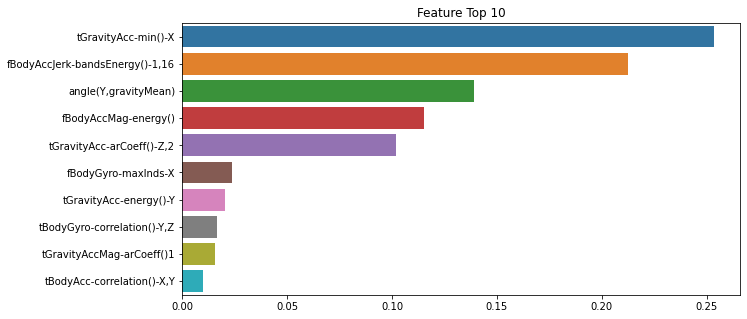

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)

feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]

plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x=feature_top10, y=feature_top10.index)
plt.show()

- 중요 피처를 그래프로 나타내기 위한 모듈을 임포트
- 최적 결정 트리 모델best_dt_HAR의 feature_importances_를 객체에 저장하고 막대 그래프로 그리기 위해 Series 자료형으로 변환하여 저장
-  중요도 값을 오름차순 정렬하여 상위 10개만 feature_top10에 저장
- 중요 피처 10개를 막대 그래프로 나타냄

In [30]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

- Graphviz 2.44.1을 설치한 경로를 환경 변수로 설정

## 5) Graphviz를 사용한 결정트리 시각화

### (1) https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/에서 "graphviz-install-2.44.1-win64.exe"를 다운로드 받아서 설치
### (2) 설치한 경로를 시스템 변수 path에 직접 추가하기
#### Program Files 폴더에 있는 graphviz 폴더 잘라내기 
#### ->  잘라낸 graphviz 폴더를 C:\Users\anaconda3\Lib\site-packages에 붙여넣기
#### ->  [제어판]-[시스템]-[고급 시스템 설정]-[환경변수]-[시스템변수]에서 Path를 선택하고 [편집]에서 C:\Users\anaconda3\Lib\site-packages\graphviz 추가하기

In [31]:
!pip install graphviz

### (3) 파이썬 래퍼 모듈 graphviz를 pip 명령으로 Anaconda에 설치

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(best_dt_HAR, out_file = "tree.dot", class_names = label_name, feature_names = feature_name, impurity = True, filled = True)

- Graphviz 인터페이스 모듈인 export_graphviz를 임포트, 결정 트리 모델best_dt_HAR의 트리 구조 정보를 dot 파일로 생성

In [52]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

BrokenPipeError: [Errno 32] Broken pipe

- dot 파일을 읽어서 트리 구조를 그림으로 나타냄